### IMPORTING THE LIBRARIES

In [1]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np 
from PIL import Image
import string
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### LOADING THE IMAGE TO BE PROCESSED

<AxesSubplot:>

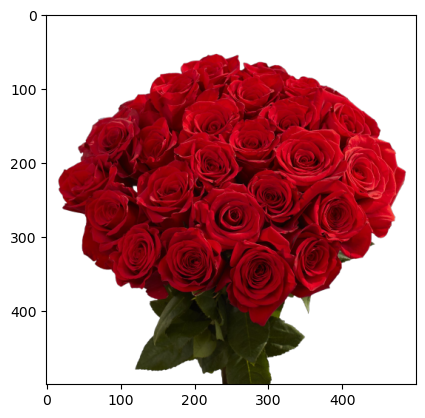

In [2]:
roseImg = Image.open('rose.png')
plt.imshow(roseImg)
plt.subplot()

In [3]:
car = Image.open('car.jpg')

In [4]:
house = Image.open('house.jpg')

In [5]:
balloons = Image.open('balloons.png')

In [6]:
roseImg.size

(500, 500)

### Transformation on Image

In [7]:
A = np.array([[0,1,0], [1,0,1],[0,-1,2],[ -1,0,3]])

In [8]:
#The identity matrix with the same size as A
I = np.eye(3)

In [9]:
rgb_color_palette = 'rgbc'

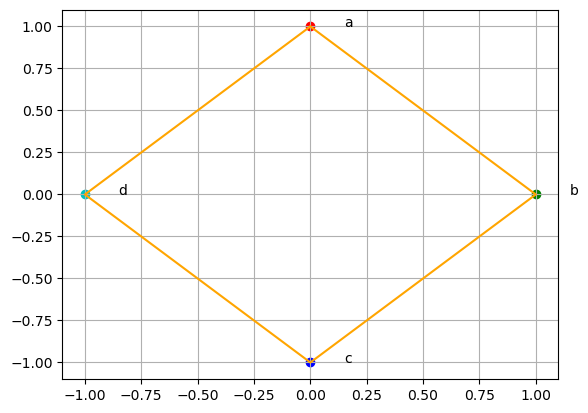

In [10]:
fig = plt.figure()
ax = plt.gca()
x_cordinates = []
y_cordinates = []

for row in A:
    output_row = I @ row
    x, y, i = output_row
    x_cordinates.append(x)
    y_cordinates.append(y)
    c = rgb_color_palette[int(i)]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
x_cordinates.append(x_cordinates[0])
y_cordinates.append(y_cordinates[0])
plt.plot(x_cordinates, y_cordinates, color="orange")
# ax.set_xticks(np.arange(-2.5, 3, 0.5))
# ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

#### scaling the object using a transformation matrix

0
2
0
-2


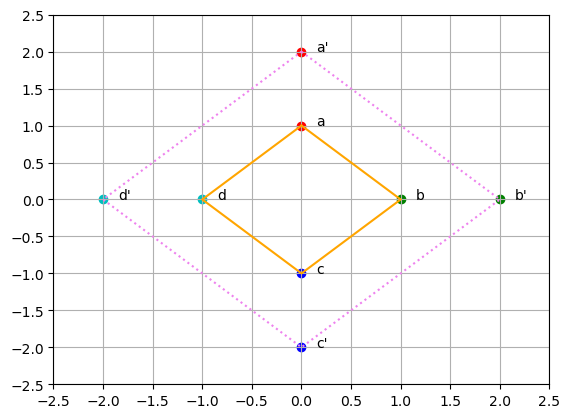

In [11]:
Trans_matrix= np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])   #transformation matrix

fig = plt.figure()
ax = plt.gca()
x_cors = []
y_cors = []
for row in A:
    output_row = Trans_matrix @ row
    x, y, i = row
    x_units, y_units, indx = output_row
    print(x_units)
    x_cors.append(x_units)
    y_cors.append(y_units)
    c, c_s = rgb_color_palette[int(i)], rgb_color_palette[int(indx)]
    plt.scatter(x, y, color=c)
    plt.scatter(x_units, y_units, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_units + 0.15, y_units, f"{string.ascii_letters[int(indx)]}'")

x_cors.append(x_cors[0])
y_cors.append(y_cors[0])
plt.plot(x_cordinates, y_cordinates, color="orange", linestyle = 'solid')
plt.plot(x_cors, y_cors, color="violet", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

#### rotation through 90 degrees using a transformation matrix

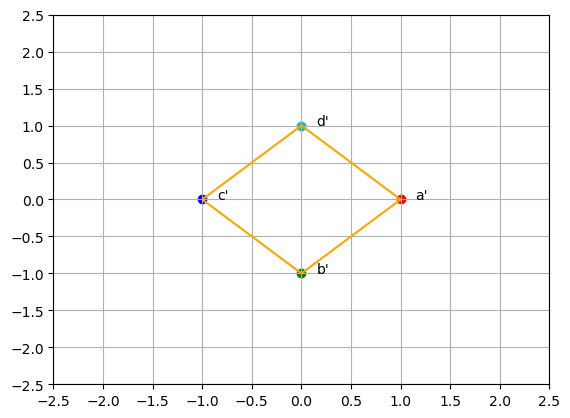

In [12]:
Trans_matrix_rot= np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
for row in A:
    output_row = Trans_matrix_rot @ row 
    x_pts, y_pts, indx_ = output_row
    c_r = rgb_color_palette[indx_] 
    letter_label = string.ascii_letters[indx_]
    plt.scatter(x_pts, y_pts, color=c_r)
    plt.text(x_pts + 0.15, y_pts, f"{letter_label}'")

plt.plot(x_cordinates, y_cordinates, color="orange", linestyle = 'solid')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

#### Now, transforming the rose image using the idea above

In [13]:
# recenter resultant image
T_center = np.array([
    [1, 0, 1000],
    [0, 1, 1000],
    [0, 0, 1]])
# rotate - opposite angle
T_rotate = np.array([
    [0, -1, 0],
    [1, 0, 0],
    [0, 0, 1]])
# scale
T_scale = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]])
# center original to 0,0
T_neg500 = np.array([
    [1, 0, -200],
    [0, 1, -200],
    [0, 0, 1]])
Transformed_img = T_center @ T_rotate @ T_scale @ T_neg500
Trans_img_inv = np.linalg.inv(Transformed_img)

In [14]:
Trans_img_inv

array([[ 0.e+00,  5.e-01, -3.e+02],
       [-5.e-01, -0.e+00,  7.e+02],
       [ 0.e+00,  0.e+00,  1.e+00]])

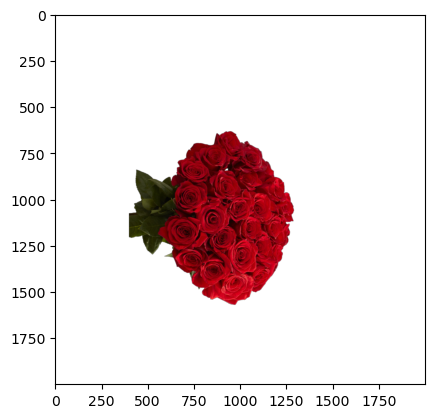

In [15]:
img_transformed = roseImg.transform((2000, 2000), Image.AFFINE, data=Trans_img_inv.flatten()[:6], resample=Image.NEAREST)
plt.imshow(np.asarray(img_transformed))

In [19]:
img_transformed.size

(2000, 2000)

#### Reiszing the roseImg using mulptiplication by scalar 

In [16]:
input_size = 1500
output_size = 750
bin_size = input_size // output_size
small_image = roseImg.resize((output_size,bin_size))
small_image


#### Translation on Image

### Image Edge Detection

In [20]:
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

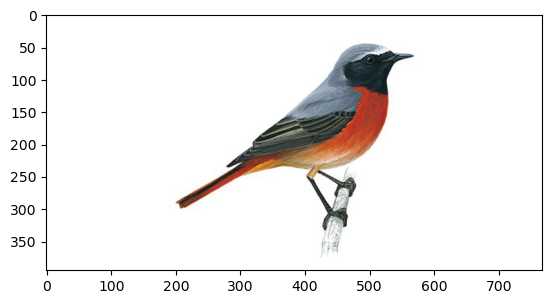

In [21]:
dove_img = plt.imread("dove.jpg")
plt.imshow(dove_img)

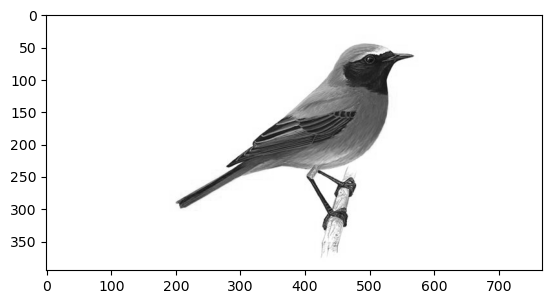

In [23]:
greyDove = dove_img.mean(axis=2, keepdims=True)/255.0
greyDove = np.concatenate([greyDove] * 3, axis=2)
plt.imshow(greyDove)

In [24]:
grey_image_edged = np.zeros_like(greyDove)

In [25]:
n,m,d = greyDove.shape

# Applying the vertical and horizontal filters to the image and then combining the results to get the edge score.
for row in range(3, n-2):
    for col in range(3, m-2):
        original_pxls = greyDove[row-1:row+2, col-1:col+2, 0]
        v_transformed_pxls = vertical_filter*original_pxls
        v_score = v_transformed_pxls.sum()/4
        h_transformed_pxls = horizontal_filter*original_pxls
        h_score = h_transformed_pxls.sum()/4
        detected_edge_score = (v_score**2 + h_score**2)**0.5
        grey_image_edged[row, col] = [detected_edge_score]*3
grey_image_edged = grey_image_edged/grey_image_edged.max()


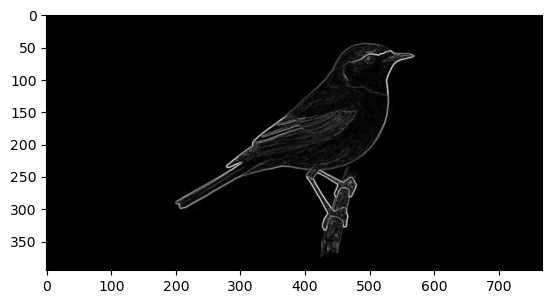

In [26]:
plt.imshow(grey_image_edged)

#### Image Shawdowing

In [ ]:
    
def make_new_image(im):
    main_image = im
    shape = main_image.shape
    row_value = shape[0]
    column_value = shape[1] + 100
    new_image = np.zeros((row_value, column_value, 3), dtype='uint8')
    for row in range(0, shape[0], 1):
        for column in range(0, shape[1], 1):
            for RGB in range(0, 3, 1):
                if main_image[row][column][0] == 255 and main_image[row][column][1] == 255 and main_image[row][column][2] == 255:
                    new_image[row][column][RGB] = main_image[row][column][RGB]
                else:
                    new_image[row][column][RGB] = 100

    for row in range(0, shape[0], 1):
        for column in range(shape[1], column_value, 1):
            for RGB in range(0, 3, 1):
                new_image[row][column][RGB] = 255
    plt.figure(figsize=(15,15))
    plt.imshow(new_image)
    plt.show()
    return new_image


In [ ]:
def shear_transformation(img):
    gray_image = img
    shape = gray_image.shape
    row_value = shape[0]
    column_value = shape[1]
    new_image = np.zeros((row_value, column_value+gray_image.shape[0], 3), dtype='uint8')
    for row in range(0, shape[0], 1):
        for column in range(0, shape[1], 1):
            for RGB in range(0, 3, 1):
                new_image[row][-row+column][RGB] = gray_image[row][column][RGB]

    for row in range(0, new_image.shape[0], 1):
        for column in range(0, new_image.shape[1], 1):
            if new_image[row][column][0] == 0 and new_image[row][column][1] == 0 and new_image[row][column][2] == 0:
                for RGB in range(0, 3, 1):
                    new_image[row][column][RGB] = 255

    correct_image = np.zeros((new_image.shape[0], new_image.shape[1], 3), dtype='uint8')
    for row in range(0, correct_image.shape[0], 1):
        for column in range(0, int(correct_image.shape[1] / 2), 1):
            for RGB in range(0, 3, 1):
                correct_image[row][int(correct_image.shape[1] / 2) + column][RGB] = new_image[row][column][RGB]

    for row in range(0, correct_image.shape[0], 1):
        for column in range(int(correct_image.shape[1]/2)+1, correct_image.shape[1], 1):
            for RGB in range(0, 3, 1):
                correct_image[row][int(-correct_image.shape[1]/2)+column][RGB] = new_image[row][column][RGB]
    plt.figure(figsize=(15, 15))
    plt.imshow(correct_image)
    plt.show()
    return correct_image


In [ ]:

def make_final_image(f_img, s_image):
    shape_first = f_img.shape
    shape_sheared = s_image.shape
    final_img = np.zeros((shape_sheared[0], shape_sheared[1], 3), dtype='uint8')
    for row in range(0, shape_first[0], 1):
        for column in range(0, shape_first[1], 1):
            if f_img[row][column][0] == 255 and f_img[row][column][1] == 255 and f_img[row][column][2] == 255:
                for RGB in range(0, 3, 1):
                    final_img[row][column][RGB] = s_image[row][column][RGB]

    for row in range(0, shape_sheared[0], 1):
        for column in range(shape_first[1], shape_sheared[1], 1):
            for RGB in range(0, 3, 1):
                final_img[row][column][RGB] = s_image[row][column][RGB]

    plt.figure(figsize=(15,15))
    plt.imshow(final_img)
    plt.show()

    for row in range(0, shape_first[0], 1):
        for column in range(0, shape_first[1], 1):
            if final_img[row][column][0] == 0 and final_img[row][column][1] == 0 and final_img[row][column][2] == 0:
                for RGB in range(0, 3, 1):
                    final_img[row][column][RGB] = f_img[row][column][RGB]

    plt.imshow(final_img)
    plt.show()


In [ ]:
new_ima = img.imread('rose.jpg')
bird_image = make_new_image(new_ima)
sheared_image = shear_transformation(bird_image)
make_final_image(bird_image, sheared_image)

In [ ]:
PIL_image = Image.fromarray(np.uint8(edges_img))
PIL_image

  # PIL_image = Image.fromarray(edges_img.astype('uint8'), 'RGB')

### Image Compression

In [27]:
dove_img = Image.open('dove.jpg')
gray_dove = dove_img.convert('LA')

In [28]:
dove_img.size

(768, 395)

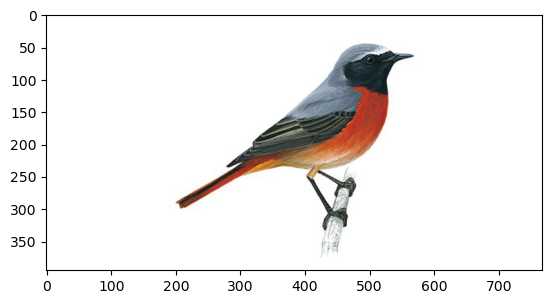

In [29]:
plt.imshow(dove_img)
plt.show()

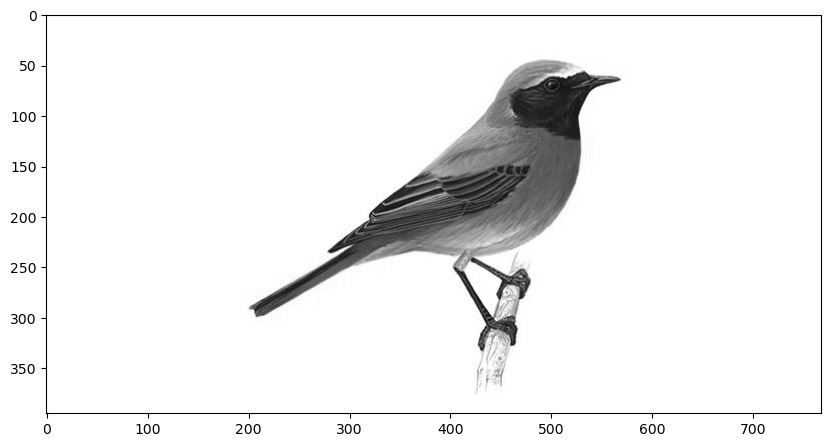

In [30]:
plt.figure(figsize = (10, 7))
plt.imshow(gray_dove)
plt.show()

In [31]:
dove_matrix = np.array(list(gray_dove.getdata(band=0)), float)
dove_matrix.shape = (gray_dove.size[1], gray_dove.size[0])
dove_matrix = np.matrix(dove_matrix)

In [32]:
U, sigma, V = np.linalg.svd(dove_matrix)

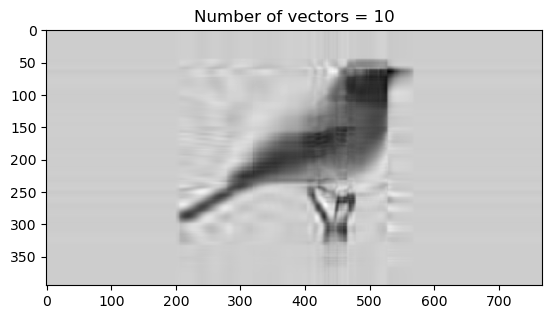

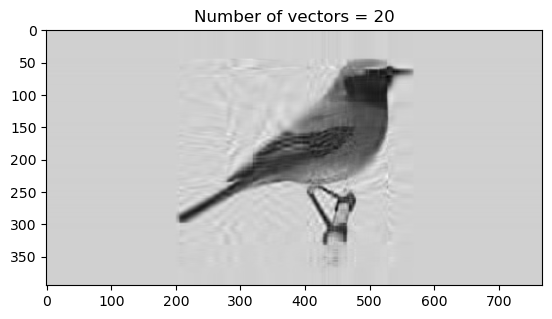

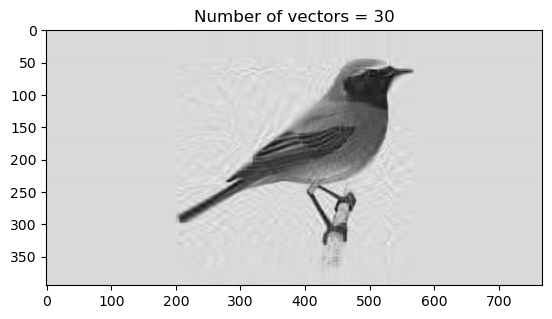

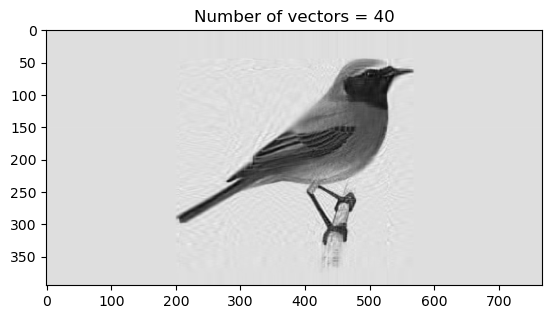

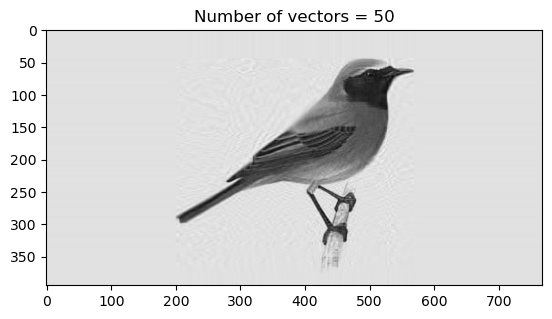

In [33]:

U, sigma, V = np.linalg.svd(dove_matrix)
for ind in range (10, 60, 10):
  remap = np.matrix(U[:, :ind]) * np.diag(sigma[:ind]) * np.matrix(V[:ind, :])
  plt.imshow(remap, cmap = 'gray')
  plt.title(f'Number of vectors = {ind}')
  plt.show()